# **Prompt**

In [18]:
prompts = [
    # "A cat sitting next to a bus.",
    # "A dog chasing a butterfly in a meadow.",
    # "A child holding a red balloon in a park.",
    # "A chef preparing sushi in a kitchen.",
    # "A bird perched on a windowsill with a view of the city skyline.",
    # "A woman reading a book under a large oak tree.",
    # "A black dog sitting beside 2 zebras, both looking in different directions.",
    # "A robot serving coffee in a cozy café.",
    # "A man playing the violin on a quiet beach at sunset.",
    # "A pair of glasses resting on a stack of books.",
    # "A horse grazing in a field with a mountain in the background.",
    # "A giraffe drinking water next to a small pond.",
    # "A boat floating on a calm lake with a forest in the distance.",
    # "A bicycle leaning against a lamppost in a quiet street.",
    # "A painter working on a canvas with a cityscape in the background.",
    # "A picnic setup with a basket, blanket, and fruit on a sunny day.",
    # "A skateboard leaning against a graffiti-covered wall.",
    # "A piano in a large, empty concert hall.",
    # "A lighthouse standing tall on a rocky cliff by the ocean.",
    # "A telescope pointing towards the night sky filled with stars.",
    # 'there are a robot made of gold and a robot made of silver are standing on an exotic planet with a red butterfly flying around them.',
    #  "A red car passing by a fire hydrant on the sidewalk.",
    #  "A painting of a couple holding a yellow umbrella in a street on a rainy night. The woman is wearing a white dress and the man is wearing a blue suit.",
    # "An old time car is parked at the curb near a stop sign.",
    #  "A mirror, a white sink and a vase with red flowers in a bathroom with an artificial light.",
    #  "A black cow standing next to a 2 red damaged cars on a dirty lot.",
    # "A red car on a steep mountain road with pine trees and a clear sky.",
    # "A delivery truck and a mailbox positioned side by side on a quiet suburban street."

    ## Prompts for Testing Object and Prompt Generator, Color and Quantity
    # "A cow standing next to many damaged cars on a dirty lot.",
    # "Two black cows standing next to a many damaged cars on a dirty lot.",
    # "2 black cows standing next to a many damaged cars on a dirty lot.",
    "Ten cows standing next to a many damaged blue cars on a dirty lot.",
    # "A black cow standing next to 2 damaged red cars on a dirty lot.",
]

# Prompt for Image Generation
recusive_diff_prompt = prompts[0]

# **Installing Libraries**

In [19]:
try:
  install_flag
except NameError:
  !pip -q install diffusers
  !pip -q install -U bitsandbytes
  install_flag = True

# **Loading Libraries**

In [20]:
if install_flag:
  # Imports
  from google.colab import userdata
  import torch
  from diffusers import StableDiffusion3Pipeline
  from transformers import T5EncoderModel, BitsAndBytesConfig
  from IPython.display import display
  import matplotlib.pyplot as plt
  import numpy as np
  # Connecting to Hugging Face
  token = userdata.get("HF_TOKEN")
  !huggingface-cli login --token {token}

# **Loading Model**

In [21]:
if install_flag:
  quantization_config = BitsAndBytesConfig(load_in_8bit=True)

  model_id = "stabilityai/stable-diffusion-3-medium-diffusers"

  text_encoder = T5EncoderModel.from_pretrained(
      model_id,
      subfolder="text_encoder_3",
      quantization_config=quantization_config,
  )

  pipe = StableDiffusion3Pipeline.from_pretrained(
      model_id,
      text_encoder_3=text_encoder,
      device_map="balanced",
      torch_dtype=torch.float16
  )
install_flag = False

# **Generating Image**

  0%|          | 0/28 [00:00<?, ?it/s]

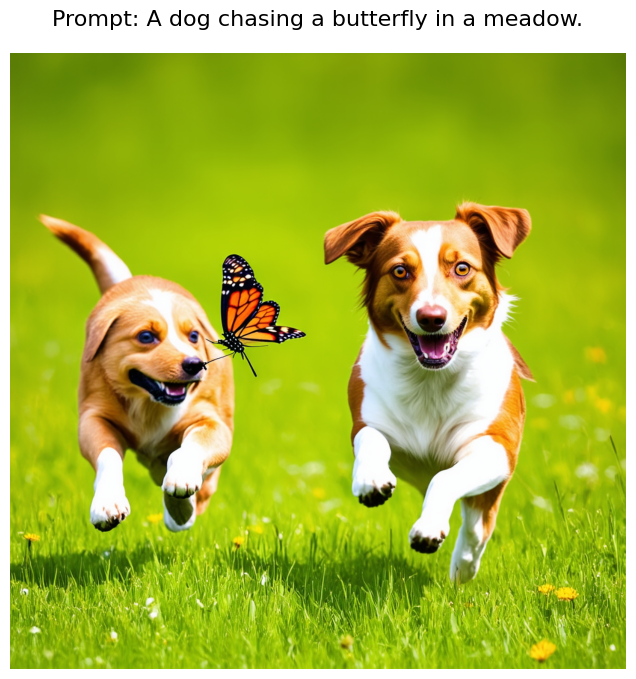

In [22]:
image = pipe(
    prompt=recusive_diff_prompt,
    negative_prompt="",
    num_inference_steps=28,
    height=1024,
    width=1024,
    guidance_scale=7.0,
).images[0]

# Convert the image to a NumPy array
image_np = np.array(image)

# Display the image with the title
plt.figure(figsize=(8, 8))
plt.imshow(image_np)
plt.axis('off')  # Hide axes
plt.title(f"Prompt: {recusive_diff_prompt}", fontsize=16, pad=20)
plt.show()